### 목표
- 타이타닉 데이터를 학습해서 생존자와 사망자를 예측해보자
- 머신러닝 전체 과정을 스스로 진행해보자
- train 데이터 -> train.csv, test 데이터 -> test.csv

In [107]:
# train과 test 데이터를 로드해서 데이터의 구조를 파악
# PassenerId를 인덱스로 설정해서 csv 파일을 로드

In [108]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
train = pd.read_csv('data/train.csv', index_col="PassengerId")
test = pd.read_csv('data/test.csv', index_col="PassengerId")

In [110]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [111]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [112]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [113]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
train.info()
# 결측치 존재 열 : Age, Cabin, Embarked
# 모델에 학습할 때는 float형을 int형으로 바꿔주어야 함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Age 컬럼의 결측치를 채우기
- 다른 컬럼들과의 상관관계를 이용해 결측치 채우기

In [116]:
# 상관관계 : 각 특성들간 영향도를 파악할 수 있음(-1(반비례) ~ 1(비례) 범위)
# 절대값이 클수록 영향도가 높아짐
train.corr() # 수치형 데이터만 출력

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

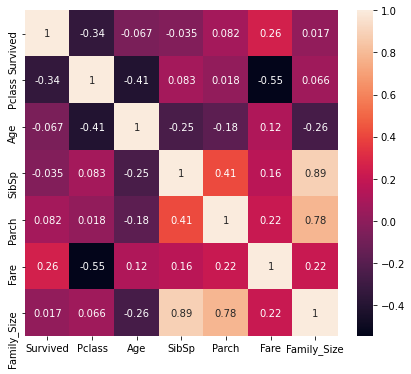

In [230]:
plt.figure(figsize=(7,6))
sns.heatmap(train.corr(), annot=True)

In [117]:
# 생존에 관련이 많을 것 같은 성별을 함께 그룹핑에 활용해보기(피벗 테이블 활용)

In [118]:
# train 데이터에 있는 값들로 피벗테이블을 만들기
# 피벗 테이블 : 테이블의 요약된 정보를 출력할 수 있는 테이블 형태
pt1 = train.pivot_table(values = 'Age', # 데이터로 사용될 열을 지정
                        # 멀티인덱스 설정(피벗 테이블은 여러 인덱스 설정 가능, Pclass로 나눈 후 Sex로 나눠줌)
                        index=['Pclass', 'Sex'], 
                        # 데이터를 요약 시 사용하는 함수를 지정(mean : 평균, sum : 합계, count : 개수)
                        aggfunc = 'mean'
                       )
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [119]:
# 멀티인덱스 슬라이싱
pt1.loc[1, 'female']

Age    34.611765
Name: (1, female), dtype: float64

In [120]:
def fill_age(row):
    # 만약 Age가 결측치라면 피벗테이블에서 값을 가져오고
    if np.isnan(row['Age']): # Age열이 Null값이라면 (np.isnan)
        return pt1.loc[row['Pclass'], row['Sex']]
    # Age가 결측치가 아니라면 원래 나이값을 그대로 사용
    else:
        return row['Age'] # 원래 Age 열에 있는 값을 사용

In [121]:
# apply : 데이터 프레임에서 행 또는 열에 복잡한 계산이나 변경을 주고 싶을 때 사용
# astype : 데이터의 타입을 변경해 줌
# test 데이터에도 데이터의 일관성을 위해서 train 데이터의 평균값을 넣어줌
# test 데이터의 데이터 편중을 방지
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')
test['Age'] = test.apply(fill_age, axis = 1).astype('int64')

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Embarked 채우기

In [124]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [125]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

train 데이터의 결측치 채우기

In [126]:
train['Embarked'] = train['Embarked'].fillna('S')

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Fare 채우기

In [129]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [130]:
pt2 = train.pivot_table(values = 'Fare', # 데이터로 사용될 열을 지정
                        # 멀티인덱스 설정(피벗 테이블은 여러 인덱스 설정 가능, Pclass로 나눈 후 Sex로 나눠줌)
                        index=['Pclass', 'Sex'], 
                        # 데이터를 요약 시 사용하는 함수를 지정(mean : 평균, sum : 합계, count : 개수)
                        aggfunc = 'mean'
                       )
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [131]:
# 불리언 인덱싱을 활용하여 Null행 찾기
# true, false로 판단할 수 있는 조건으로만 설정
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [132]:
test['Fare'] = test['Fare'].fillna(12.661633)

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 채우기

In [134]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [135]:
train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
E101           3
              ..
D21            1
B4             1
A5             1
A24            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [136]:
# train과 test 데이터의 결측치를 임의의 문자 M으로 채우면서
# 새로운 열인 Deck을 생성
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [137]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C85
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C123
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,M
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,B42
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S,M


In [138]:
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [139]:
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [140]:
# train, test 데이터에서 기존에 있던 Cabin 컬럼을 지우기
# del train['Cabin']
# del test['Cabin']
train.drop('Cabin', inplace = True, axis = 1)
test.drop('Cabin', inplace = True, axis = 1)
# inplace = True : 변경된 값을 변수에 바로 저장
# drop : 행과 열 모두 삭제할 수 있음
# del : 열만 삭제 가능

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


### Deck 시각화

In [142]:
# .groupby : 그룹별로 데이터를 집계, 요약 해보기
train_deck = train[['Deck', 'Survived', 'Name']].groupby(['Deck', 'Survived']).count()
train_deck

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [143]:
# seaborn : 시각화 라이브러리
# -> matplotlib에 비해서 색상이 좀 더 깔끔하고 그래프를 그리는 기본 기능이 좋음
# -> pandas 호환성도 좋음
import seaborn as sns

<AxesSubplot:xlabel='Deck', ylabel='count'>

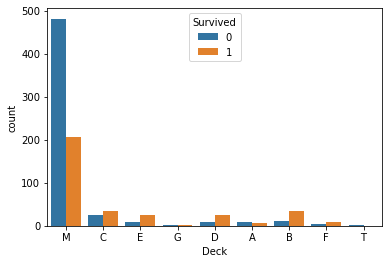

In [144]:
sns.countplot(data=train,
             x='Deck',
             hue='Survived' # hue : 해당 컬럼의 unique 값들이 들어가서 출력됨
             )

- M(결측치가 있는 데이터)에서 상대적으로 사람이 많이 죽었음
- 생존 여부를 판단하는데 활용해도 좋다는 판단

### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

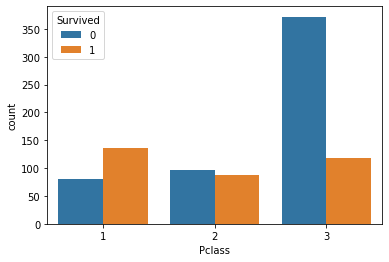

In [145]:
sns.countplot(data=train,
             x='Pclass',
             hue='Survived'
             )

- Pclass가 3일때 사망률이 높음

### Deck과 Pclass를 시각화

<AxesSubplot:xlabel='Deck', ylabel='count'>

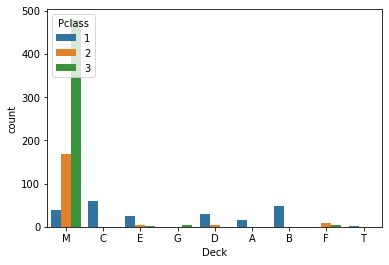

In [146]:
# Deck과 Pclass의 관계를 시각화
sns.countplot(data=train,
             x='Deck',
             hue='Pclass' # hue : 해당 컬럼의 unique 값들이 들어가서 출력됨
             )

In [147]:
# Sex와 Embarked를 시각화
train_deck2 = train[['Embarked', 'Sex', 'Name']].groupby(['Embarked', 'Sex']).count()
train_deck2

Name
Embarked Sex         
C        female    73
         male      95
Q        female    36
         male      41
S        female   205
         male     441

<AxesSubplot:xlabel='Embarked', ylabel='count'>

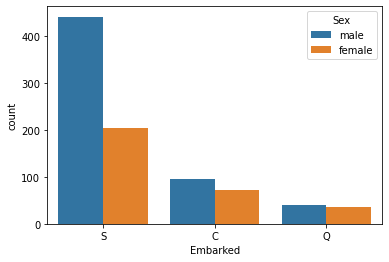

In [148]:
sns.countplot(data=train,
             x='Embarked',
             hue='Sex' # hue : 해당 컬럼의 unique 값들이 들어가서 출력됨
             )

- S 항구에서 탑승자가 많았고, 특히 남자가 많았음

<AxesSubplot:xlabel='Sex', ylabel='count'>

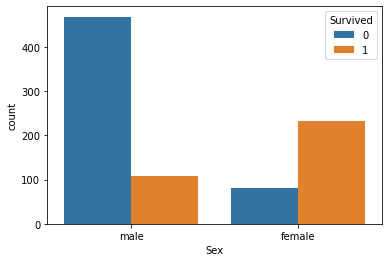

In [149]:
sns.countplot(data=train,
             x='Sex',
             hue='Survived' # hue : 해당 컬럼의 unique 값들이 들어가서 출력됨
             )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

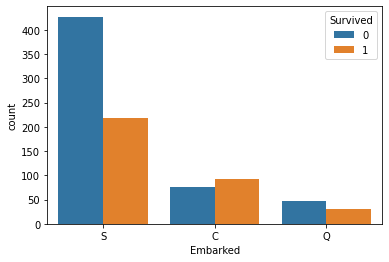

In [150]:
sns.countplot(data=train,
             x='Embarked',
             hue='Survived' # hue : 해당 컬럼의 unique 값들이 들어가서 출력됨
             )

- 탑승 항구가 S인 곳에서 탑승한 사람이 많았고 사망 수치도 높았음

### Age 시각화

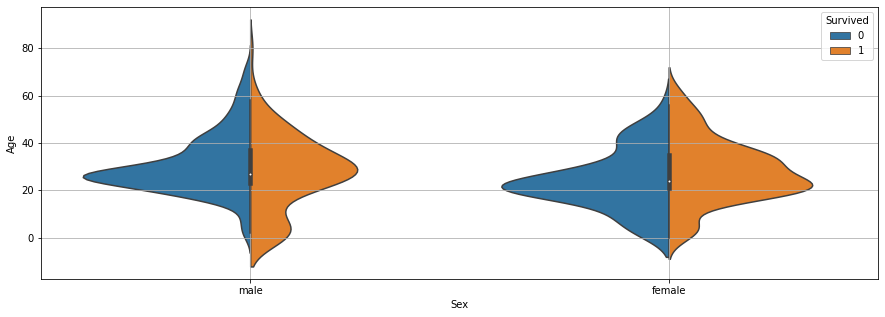

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

sns.violinplot(data=train,
              x='Sex',
              y='Age',
              hue='Survived',
              split=True
              )
plt.grid()

- 20 ~ 30 대의 탑승자가 많았고 사망자도 많음
- 20대 미만의 어린 아이 중에서는 남자가 여자에 비해서 많이 생존함

### Fare 시각화

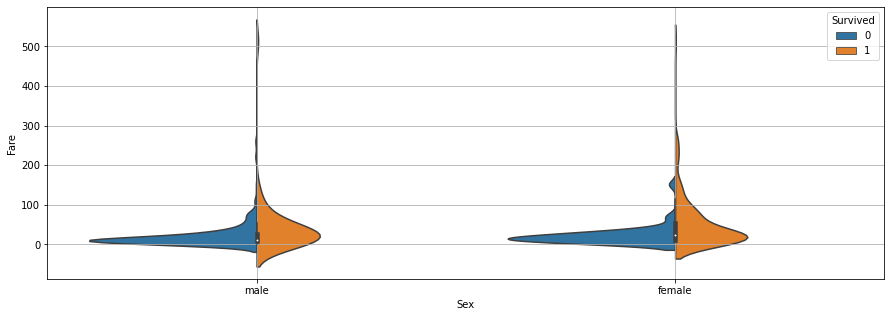

In [152]:
plt.figure(figsize=(15,5))

sns.violinplot(data=train,
              x='Sex',
              y='Fare',
              hue='Survived',
              split=True
              )
plt.grid()

### Parch - 함께 탑승한 부모자식의 수

### SibSp - 함께 탑승한 형제자매, 배우자의 수
- Parch와 SibSp를 더해서 가족의 숫자라는 새로운 컬럼을 생성
- train과 test 모두에 작업

In [153]:
# 가족의 숫자 라는 새로운 컬럼 생성
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1 # 혼자 온 사람도 있으므로
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

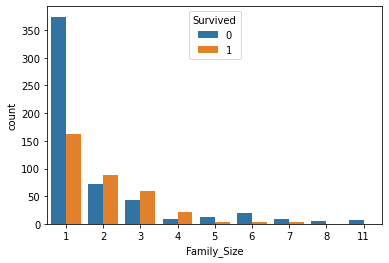

In [154]:
sns.countplot(data=train,
             x='Family_Size',
             hue='Survived')

- 1명일때는 죽은 비율이 높고, 2~4명일 때는 산 비율이 높고, 5명 이상이면 죽은 비율이 높음

- 가족 사이즈가 1이면 Alone, 2 ~ 4이면 Small, 5 이상이면 Large

In [155]:
bins = [0, 1, 4, 11]
labels = ['Alone', 'Small', 'Large']
# bins = 범주값을 입력(ex. 0~1, 1~4, 4~11)
train['Family_Group'] = pd.cut(train['Family_Size'], bins=bins, labels=labels)
test['Family_Group'] = pd.cut(test['Family_Size'], bins=bins, labels=labels)

In [156]:
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [157]:
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

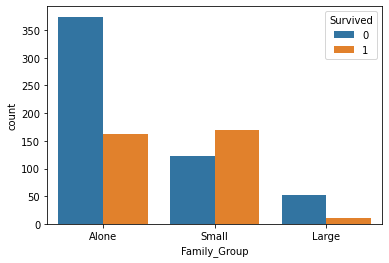

In [158]:
sns.countplot(data=train,
             x='Family_Group',
             hue='Survived'
             )

### Text 데이터 다루기
- 중간 호칭만 추출

In [159]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [160]:
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()

In [161]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [162]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [163]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

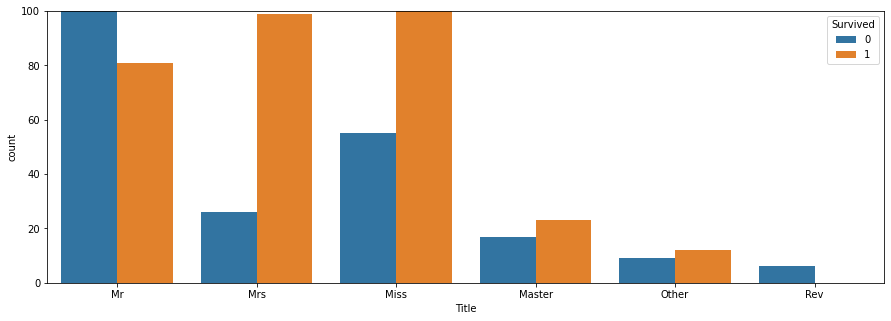

In [232]:
plt.figure(figsize=(15,5))
plt.ylim(0,100) # y축 최대 표현 범위 설정
sns.countplot(data=train,
             x='Title',
             hue='Survived'
             )
plt.show()

In [165]:
# 개수가 적은 호칭들은 Other로 묶기

In [166]:
# train['Title'] 컬럼의 unique 값들을 그래도 복사해서 title이라는 변수에 담음
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [167]:
len(title)

17

In [168]:
# 중요한 호칭들만 그대로 사용하고 나머지는 Other로 변환하여 리스트에 저장
convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [169]:
# zip 함수를 사용하여 리스트 형태인 title과 convert_title을 차례대로
# key, value 값으로 만드는 딕셔너리를 생성

In [170]:
title_dict = dict(zip(title, convert_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [171]:
# 데이터명(딕셔너리 key값 -> 딕셔너리 value값)
train['Title'] = train['Title'].map(title_dict)
# map : 시리즈 형태에만 적용됨
# applymap : 데이터프레임 형태에 적용

In [172]:
# test 데이터에만 Dona라는 호칭이 존재하므로 따로 Other로 변경시켜줌
title_dict['Dona'] = 'Other'
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [173]:
test['Title'] = test['Title'].map(title_dict)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

### Ticket, Name 컬럼 삭제하기

In [174]:
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [175]:
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Size   891 non-null    int64   
 10  Family_Group  891 non-null    category
 11  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 124.5+ KB


In [177]:
# train 데이터에서 정답 컬럼
y_train = train.iloc[:, 0]
# train 데이터에서 정답 컬럼을 삭제한 후 남은 모든 컬럼들
X_train = train.iloc[:, 1:]
# 맨 처음에 받았던 test 데이터
X_test = test

In [178]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'Family_Size', 'Family_Group', 'Title'],
      dtype='object')

In [179]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'Family_Size', 'Family_Group', 'Title'],
      dtype='object')

In [180]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_Size   891 non-null    int64   
 9   Family_Group  891 non-null    category
 10  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 117.5+ KB


In [ ]:
# X_train = pd.get_dummies(X_train)
# 최신 버전은 알아서 문자열 데이터만 원 핫 인코딩 해줌

In [181]:
str_feature = ['Sex', 'Embarked', 'Deck', 'Family_Group', 'Title']

In [182]:
tmp = pd.get_dummies(train['Sex'], prefix = 'Sex') # prefix : 직관적으로 볼 수 있게 표시
tmp

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [183]:
# X_train 문자형 컬럼들을 인코딩 -> 병합 -> 기존 열 삭제
for i in str_feature:
    # 원 핫 인코딩 후 결과를 dummy 변수에 담아줌
    dummy = pd.get_dummies(train[i], prefix = i)
    # X_test에 dummy를 합쳐줌
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(i, axis=1, inplace=True)

In [184]:
for i in str_feature:
    # 원 핫 인코딩 후 결과를 dummy 변수에 담아줌
    dummy = pd.get_dummies(test[i], prefix = i)
    # X_test에 dummy를 합쳐줌
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace=True)

- 인코딩 후 train과 test 데이터의 컬럼 개수가 차이 나게 됨

In [185]:
# set : 중복이 없는 요소들(unique)로만 구성된 집합
set(X_train.columns) - set(X_test.columns)
# X_train에는 X_test에 없는 Deck_T 라는 컬럼이 존재

{'Deck_T'}

In [186]:
# 컬럼 개수를 맞춰주기 위해 추가해줌
# Deck_T의 컬럼은 생기지만 실제로 컴퓨터는 데이터가 없는 것으로 인식함(원 핫 인코딩이므로)
X_test['Deck_T'] = 0

In [187]:
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 29)


In [188]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [189]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev', 'Deck_T'],
      dtype='object')

In [190]:
# 위치 변경을 위해 Deck_T 컬럼을 tmp 변수에 담아줌
tmp = X_train['Deck_T']

In [191]:
# 기존 X_train 데이터프레임에서 Deck_T 컬럼을 삭제
X_train.drop('Deck_T', axis=1, inplace=True)

In [192]:
# X_train에 Deck_T를 담아준 tmp를 다시 열방향을 붙여줌
X_train = pd.concat([X_train, tmp], axis=1)
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,2,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,38,1,0,71.2833,2,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,3,26,0,0,7.9250,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,35,1,0,53.1000,2,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,3,35,0,0,8.0500,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,0,0,13.0000,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
888,1,19,0,0,30.0000,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
889,3,21,1,2,23.4500,4,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### 모델링(선택, 학습)

In [193]:
from sklearn.model_selection import cross_val_score # 교차검증을 사용하기 위한 라이브러리

### Tree 모델

In [212]:
tree_model = DecisionTreeClassifier(max_depth=2)

In [213]:
# 교차검증 적용해보기
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv=5
                        )
result

array([0.74860335, 0.79775281, 0.81460674, 0.75842697, 0.79775281])

In [196]:
result.mean()

0.8114619295712762

### KNN 모델

In [197]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [198]:
result2 = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv=5
                        )
result2

array([0.72067039, 0.69101124, 0.74157303, 0.75842697, 0.73595506])

In [199]:
result2.mean()

0.7295273366392567

### KNN Scaler 적용

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()

In [202]:
scaler.fit(X_train)

StandardScaler()

In [203]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[ 0.82737724, -0.5404969 ,  0.43279337, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-1.56610693,  0.66195688,  0.43279337, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.15536387,
        -0.0823387 , -0.03352008],
       ...,
       [ 0.82737724, -0.61565027,  0.43279337, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-1.56610693, -0.23988346, -0.4745452 , ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724,  0.21103671, -0.4745452 , ..., -0.15536387,
        -0.0823387 , -0.03352008]])

In [204]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 0.82737724,  0.36134344, -0.4745452 , ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724,  1.33833714,  0.43279337, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-0.36936484,  2.46563756, -0.4745452 , ..., -0.15536387,
        -0.0823387 , -0.03352008],
       ...,
       [ 0.82737724,  0.66195688, -0.4745452 , ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346,  0.43279337, ..., -0.15536387,
        -0.0823387 , -0.03352008]])

In [205]:
result2 = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv=5
                        )
result2

array([0.79888268, 0.74719101, 0.80898876, 0.76404494, 0.83146067])

In [95]:
result2.mean()

0.7901136149645346

### ------------------------------------------------------------------------------------

In [233]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### 랜덤 포레스트

In [234]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=11)

### 에이다 부스팅

In [235]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=11)

### 보팅

In [236]:
voting_model = VotingClassifier(
    estimators=[
        ('knn1', knn_model),
        ('tree1', tree_model),
        ('forest1', forest_model),
        ('ada1', ada_model)
    ],
    voting = 'soft' # 보팅 방식을 설정(하드/소프트)
)

In [237]:
# !pip install xgboost

In [238]:
# !pip install lightgbm

In [239]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### XG 부스팅

In [240]:
xg_model = XGBClassifier(n_estimators=100, random_state=11)

### Light GBM

In [241]:
lgb_model = LGBMClassifier(n_estimators=1000, learning_rate=0.05, random_state=11)

### Kaggle 제출용 파일을 만들어보자

In [242]:
result = pd.read_csv('data/gender_submission.csv')
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [250]:
# 변수명은 맞출것
ada_model.fit(X_train, y_train) # 모델 학습
pre = ada_model.predict(X_test) # 모델로 예측

In [251]:
pre

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [252]:
# result 변수에 Survived라는 열을 추가(추가는 예측한 결과 값인 pre를 넣어줌)
result['Survived'] = pre

In [253]:
# 파일로 내보냄
result.to_csv('submission_ada.csv', index = False) # index 지정 안함